In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('data.csv', sep=',')

df.head()

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [60]:
df2 = df.copy()

use_mapping = {'CL0': 0,
               'CL1': 0,
               'CL2': 0,
               'CL3': 0,
               'CL4': 1,
               'CL5': 1,
               'CL6': 1}

for j in ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']:
    temp = []
    for i in df[j]:
        temp.append(use_mapping[i])

    df2[j] = temp

df2.head()

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,0,0
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,1,0,0,0,0,0,0,1,0,0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,0,0,0
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,0,0,0


In [61]:
ed_mapping = {'Left school before 16 years': 1,
                'Left school at 16 years':2,
                'Left school at 17 years':3,
                'Left school at 18 years':4,
                'Some college or university, no certificate or degree':5,
                'Professional certificate/ diploma':6,
                'University degree':7,
                'Masters degree':8,
                'Doctorate degree':9,}


df2.education = df2.education.map(ed_mapping)

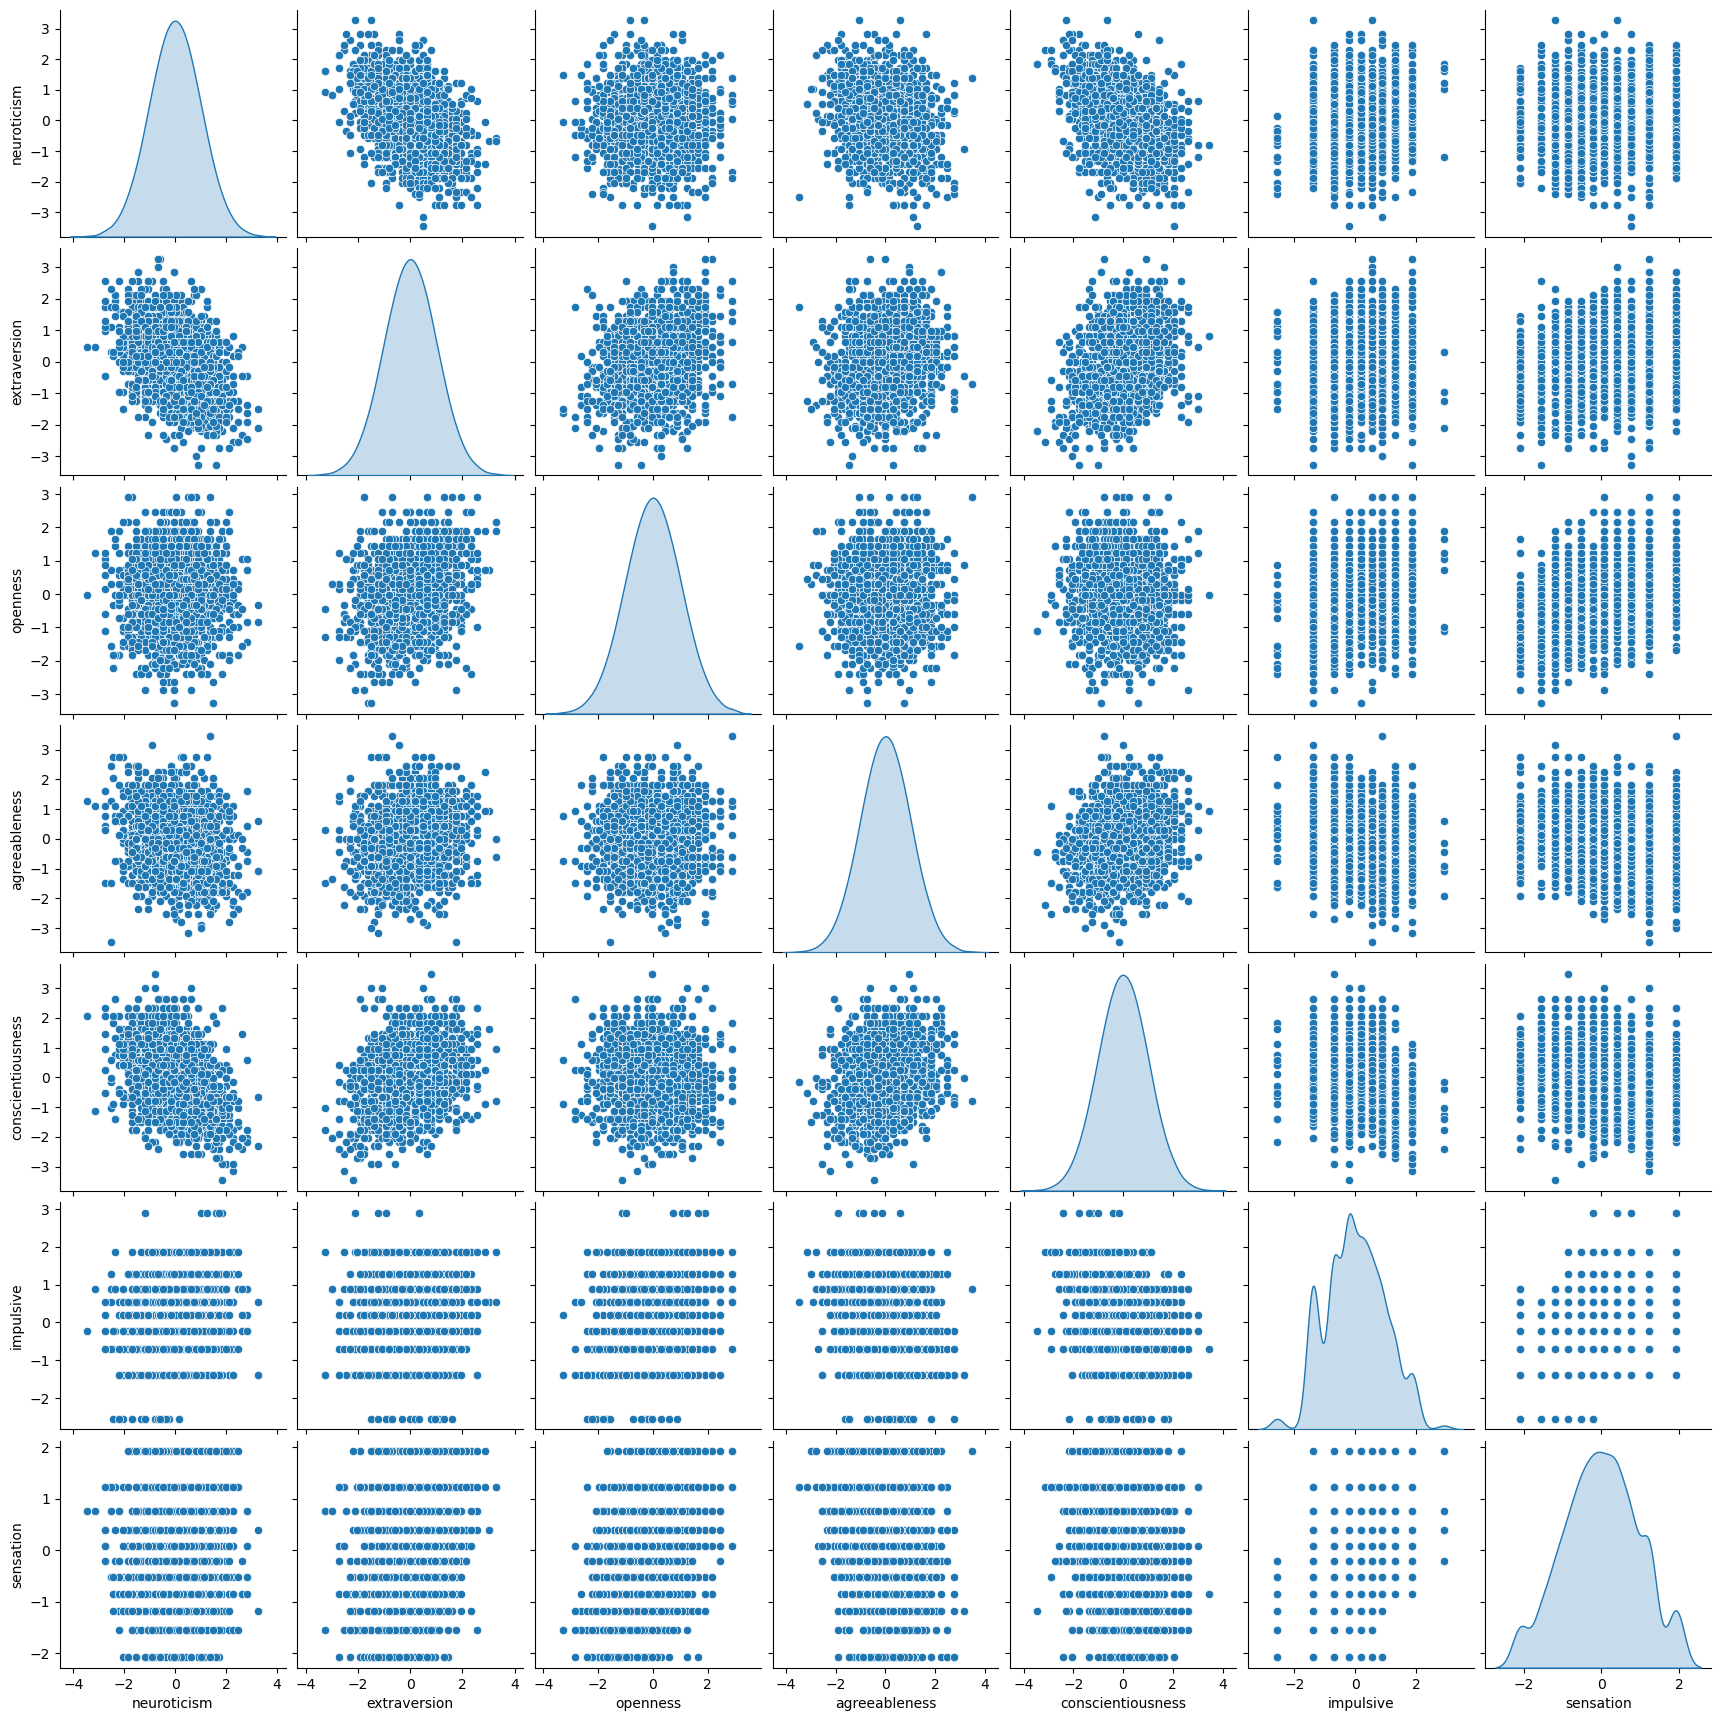

In [62]:
sns.pairplot(data=df2, vars=['neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'impulsive', 'sensation'], diag_kind='kde');

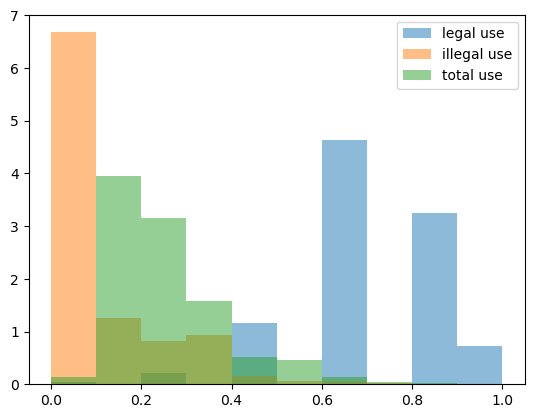

In [63]:
leg = ['Alcohol', 'Caff', 'Choc', 'Legalh',  'Nicotine']
ileg = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',  'LSD', 'Meth', 'Mushrooms', 'VSA']
fic = ['Semer']

pers = ['neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsive', 'sensation']
n = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,]
plt.hist(df2[leg].sum(axis=1)/len(leg), label='legal use', alpha=0.5, bins=n, density=True)
plt.hist(df2[ileg].sum(axis=1)/len(ileg), label='illegal use', alpha=0.5, bins=n, density=True)
plt.hist(df2[ileg+leg].sum(axis=1)/len(ileg+leg), label='total use', alpha=0.5, bins=n, density=True);
#plt.hist(df2[fic].sum(axis=1)/len(fic));

plt.legend();

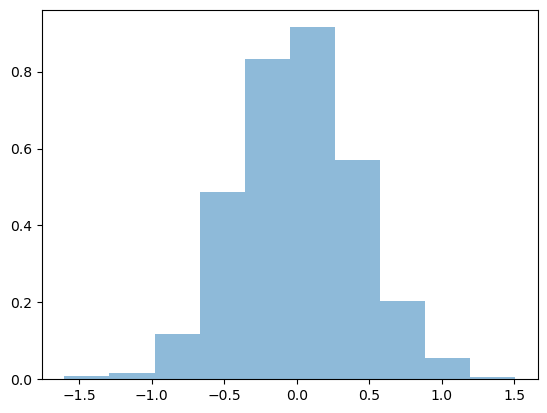

In [64]:
plt.hist(df2[pers].sum(axis=1)/len(pers), alpha=0.5, density=True);

In [65]:
from pprint import pprint

In [66]:
arr = np.array(df2[pers])

pprint(np.cov(arr.T).round(1))

array([[ 1. , -0.4,  0. , -0.2, -0.4,  0.2,  0.1],
       [-0.4,  1. ,  0.2,  0.2,  0.3,  0.1,  0.2],
       [ 0. ,  0.2,  1. ,  0. , -0.1,  0.3,  0.4],
       [-0.2,  0.2,  0. ,  1. ,  0.2, -0.2, -0.2],
       [-0.4,  0.3, -0.1,  0.2,  1. , -0.3, -0.2],
       [ 0.2,  0.1,  0.3, -0.2, -0.3,  0.9,  0.6],
       [ 0.1,  0.2,  0.4, -0.2, -0.2,  0.6,  0.9]])


In [67]:
cor = np.corrcoef(arr.T)

pd.DataFrame(cor.round(2), columns=pers, index=pers)#.to_latex()

,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation
neuroticism,1.00,-0.43,0.01,-0.22,-0.39,0.17,0.08
extraversion,-0.43,1.00,0.25,0.16,0.31,0.11,0.21
openness,0.01,0.25,1.00,0.04,-0.06,0.28,0.42
agreeableness,-0.22,0.16,0.04,1.00,0.25,-0.23,-0.21
conscientiousness,-0.39,0.31,-0.06,0.25,1.00,-0.34,-0.23
impulsive,0.17,0.11,0.28,-0.23,-0.34,1.00,0.62
sensation,0.08,0.21,0.42,-0.21,-0.23,0.62,1.00


In [68]:
df2.groupby('Semer').count() #3 people claim to have used a non-existance drug recently

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
Semer,,,,,,,,,,,,,,,,,,,,,
0,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,...,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [69]:
sdf = df2[df2.Semer==1]
sdf[['age','gender','education'] + pers]

,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation
1533,18-24,Female,5,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575


In [70]:
sdf[leg+ileg]

,Alcohol,Caff,Choc,Legalh,Nicotine,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
1533,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0


In [71]:
for i in leg+ileg:
    temp = [i,df2[i].sum(axis=0)/df2.shape[0]]
    print(f'{i} users: {df2[i].sum(axis=0)/df2.shape[0]:.1%}')

Alcohol users: 82.3%
Caff users: 93.6%
Choc users: 94.7%
Legalh users: 12.8%
Nicotine users: 46.4%
Amphet users: 12.6%
Amyl users: 2.2%
Benzos users: 15.9%
Cannabis users: 41.8%
Coke users: 8.4%
Crack users: 1.1%
Ecstasy users: 12.7%
Heroin users: 2.8%
Ketamine users: 4.2%
LSD users: 8.8%
Meth users: 9.1%
Mushrooms users: 8.4%
VSA users: 1.8%


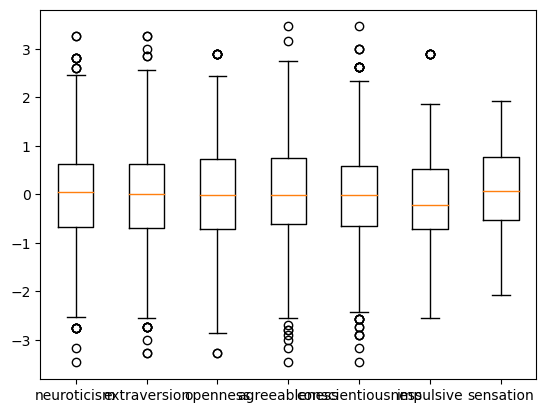

In [72]:
plt.boxplot(df[pers], labels=pers);

In [73]:
df3 = df.copy()

use_mapping = {'CL0': 0,
               'CL1': 1,
               'CL2': 2,
               'CL3': 3,
               'CL4': 4,
               'CL5': 5,
               'CL6': 6}

for j in ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']:
    temp = []
    for i in df[j]:
        temp.append(use_mapping[i])

    df3[j] = temp

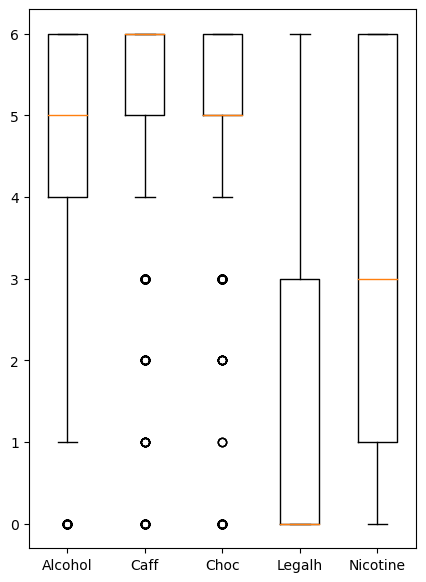

In [74]:
_,ax = plt.subplots(figsize=(5,7))
ax.boxplot(df3[leg], labels=leg);

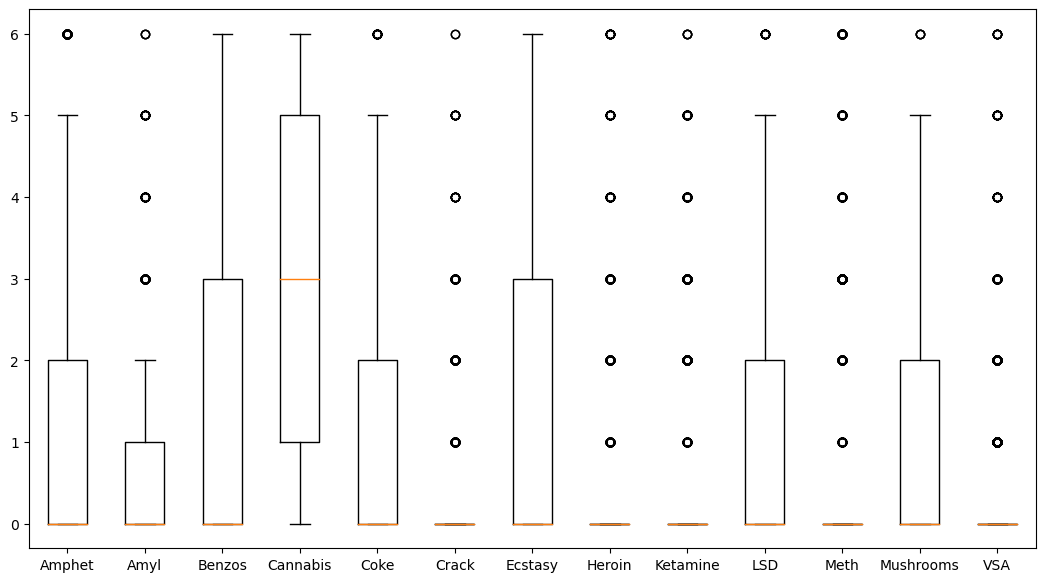

In [75]:
_,ax = plt.subplots(figsize=(13,7))
ax.boxplot(df3[ileg], labels=ileg);

In [76]:
df2.columns

Index(['id', 'age', 'gender', 'education', 'country', 'ethnicity',
       'neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'impulsive', 'sensation', 'Alcohol', 'Amphet',
       'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

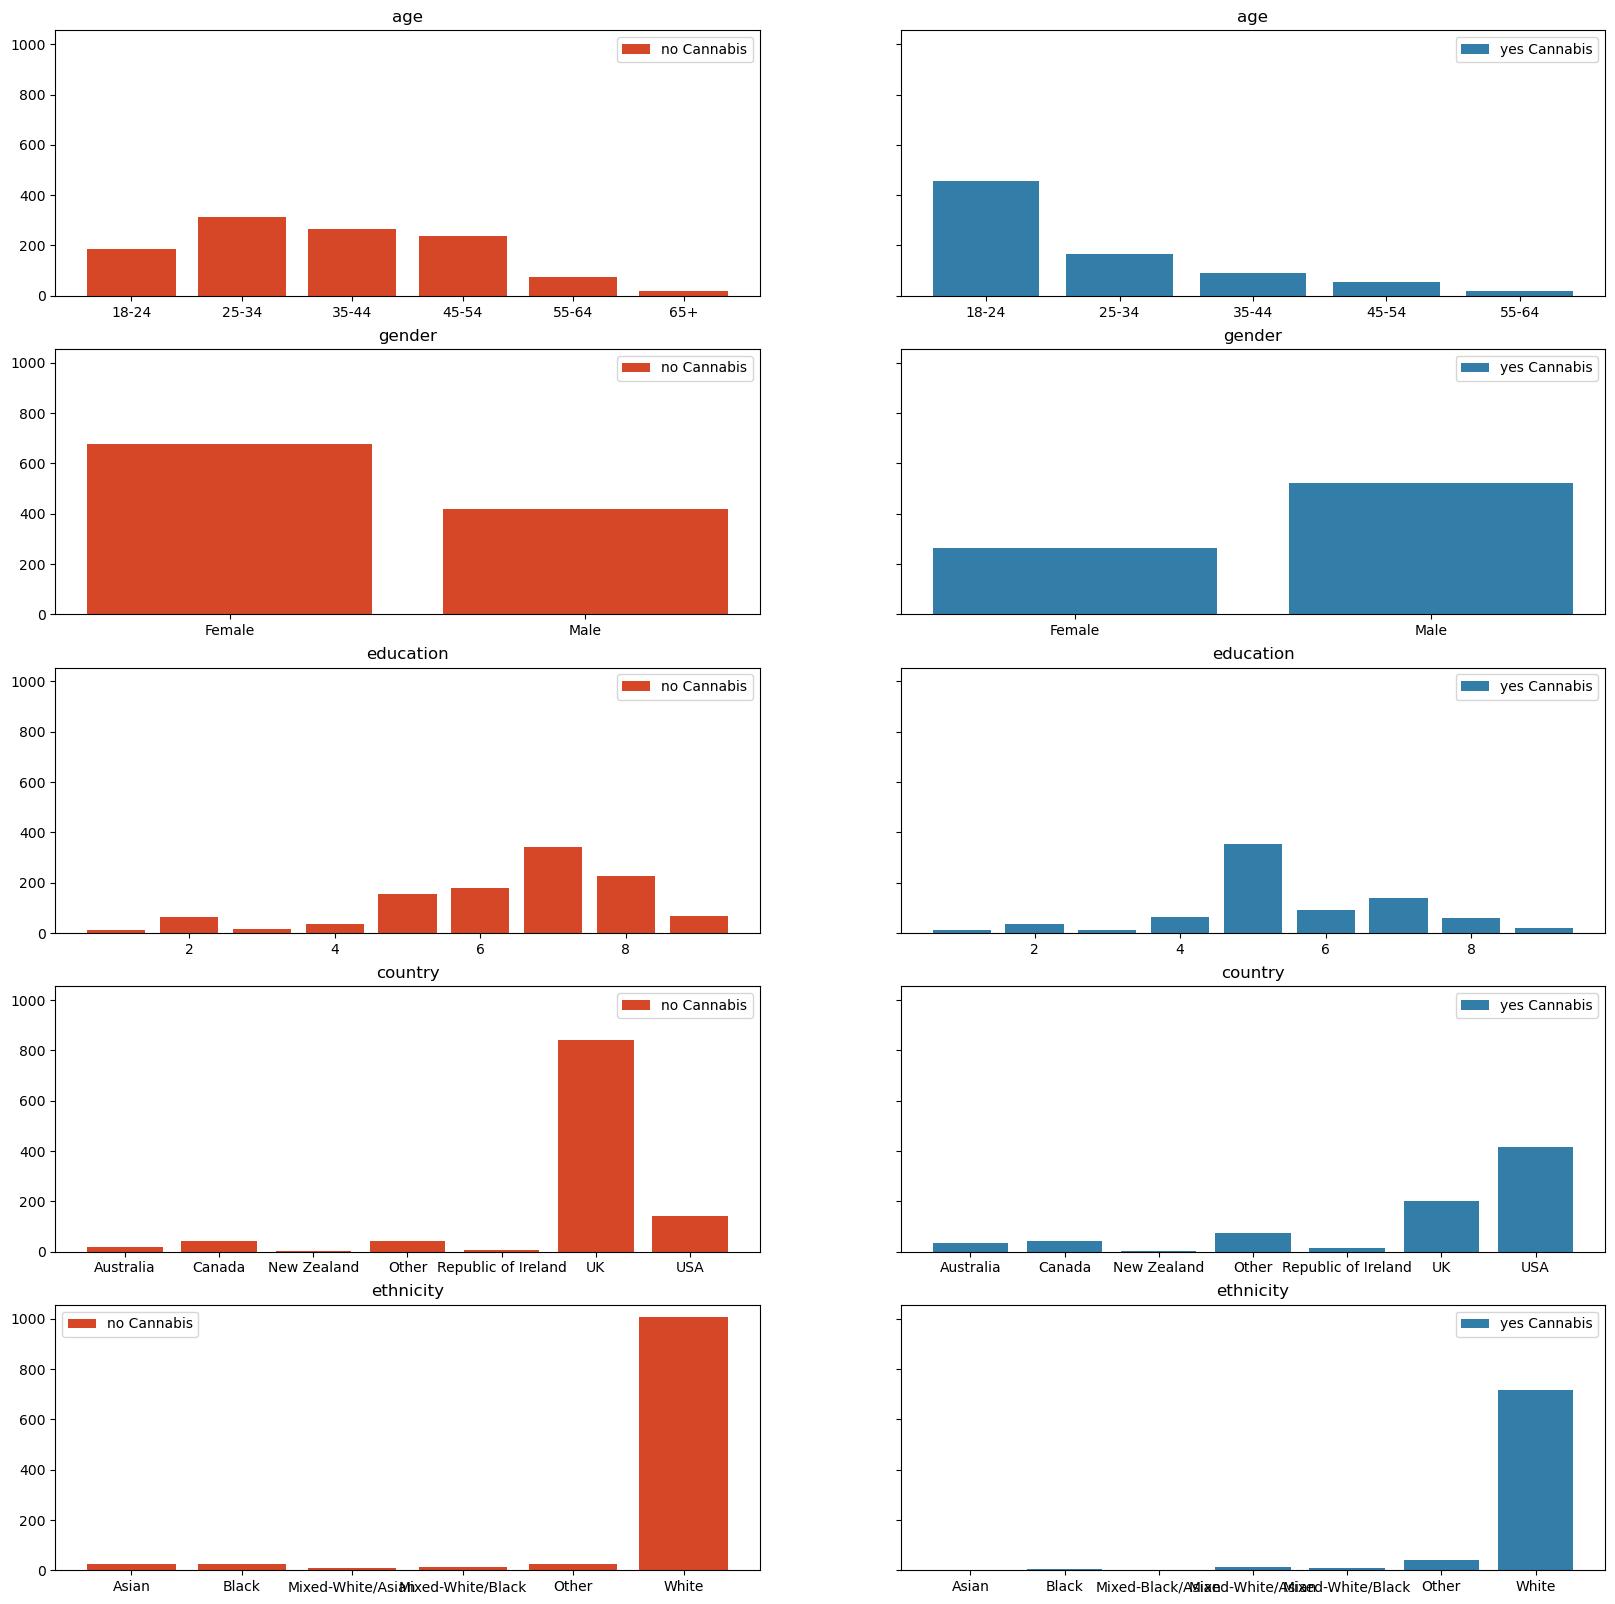

In [77]:
other = ['age', 'gender', 'education', 'country', 'ethnicity']

drug = 'Cannabis'
n = len(other)
_, axes = plt.subplots(n,2, figsize=(20,20), sharey=True)

for i in range(n):
    cat = other[i]
    a = df2[df2[drug]==0]
    b = df2[df2[drug]==1]

    temp = a.groupby(cat).count()
    #print(temp.index)
    axes[i,0].bar(temp.index, temp.id, facecolor='#D64728',label=f'no {drug}')
    axes[i,0].set_title(f'{cat}')
    axes[i,0].legend()

    temp2 = b.groupby(cat).count()
    #print(temp2.index)
    axes[i,1].bar(temp2.index, temp2.id, facecolor='#337EA9',label=f'yes {drug}')
    axes[i,1].set_title(f'{cat}')
    axes[i,1].legend();

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [80]:
def Log_func(drug, axes, model='LR'):
    drug = drug
    X = df2[pers]
    y = df2[drug]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    if model == 'LR':
        cls = LogisticRegression(random_state=42, solver='newton-cholesky')
    elif model == 'GB':
        cls= GaussianNB()
    #cv_results = cross_validate(cls, X_train, y_train, cv=3, scoring='f1_macro')
    #print(f'{drug}: {cv_results["test_score"]}', end=' ')
    

    cls.fit(X_train, y_train)
    y_hat = cls.predict(X_test)
    print(f'{drug} f1: {f1_score(y_test, y_hat, average="macro"):.2%}')
    #print(f'training set: {sum(y_train)/len(y_train):.2%}\ntest set: {sum(y_test)/len(y_test):.2%}')
    cm = confusion_matrix(y_test, y_hat)


    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    axes.set_title(f'{drug}')
    #sns.heatmap(cm, annot=True, cmap='Blues', ax=axes);
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=axes);

Alcohol f1: 45.12%
Alcohol f1: 45.12%
Caff f1: 48.36%
Caff f1: 48.36%
Choc f1: 48.64%
Choc f1: 48.64%
Legalh f1: 46.45%
Legalh f1: 57.10%
Nicotine f1: 64.11%
Nicotine f1: 64.50%


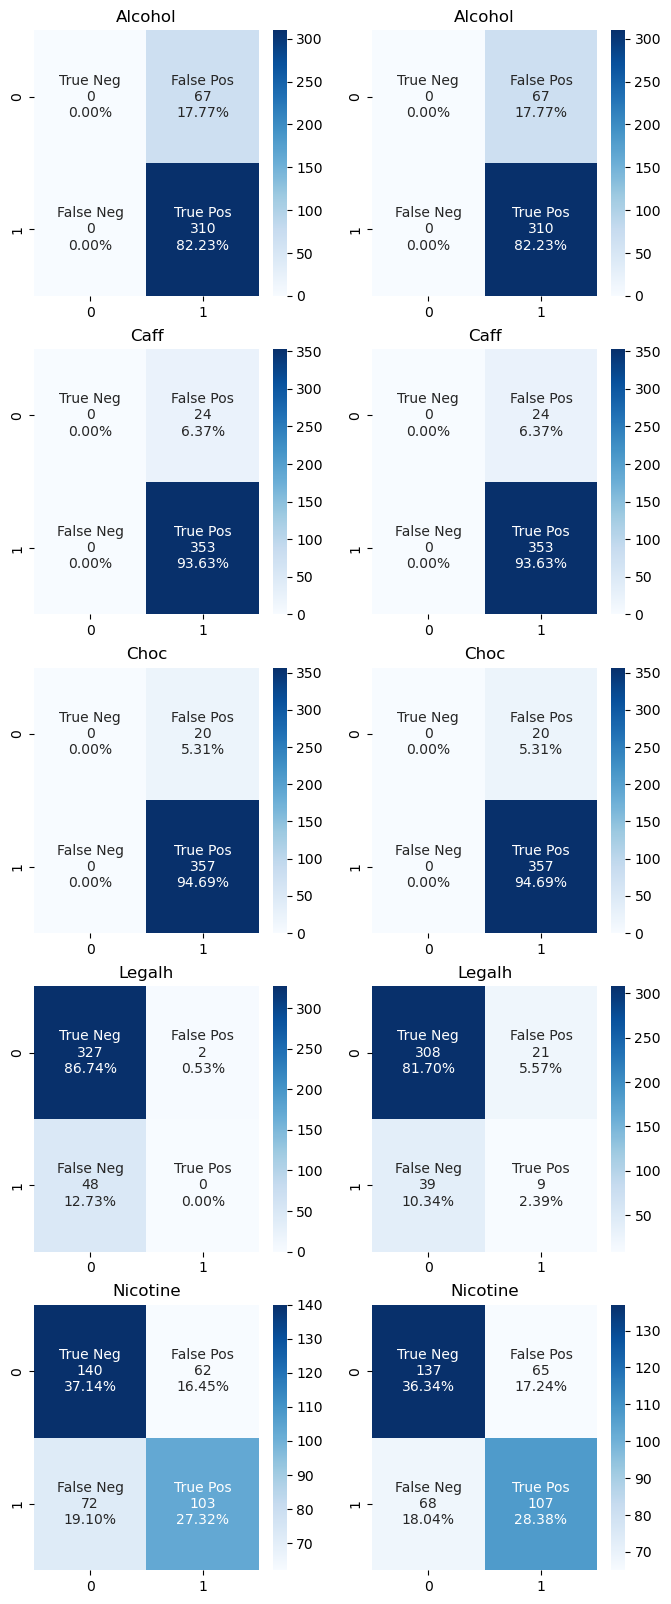

In [81]:
n = len(leg)
_, ax = plt.subplots(n,2, figsize=(8,4*n))

for i in range(n):
    Log_func(leg[i],ax[i,0], 'LR')
    Log_func(leg[i],ax[i,1], 'GB')

Amphet f1: 50.43%
Amphet f1: 51.91%
Amyl f1: 49.46%
Amyl f1: 49.46%
Benzos f1: 51.02%
Benzos f1: 61.44%
Cannabis f1: 67.50%
Cannabis f1: 71.21%
Coke f1: 47.78%
Coke f1: 52.31%
Crack f1: 49.73%
Crack f1: 49.67%
Ecstasy f1: 46.52%
Ecstasy f1: 55.47%
Heroin f1: 49.26%
Heroin f1: 56.96%
Ketamine f1: 48.92%
Ketamine f1: 53.77%
LSD f1: 47.57%
LSD f1: 50.89%
Meth f1: 47.64%
Meth f1: 63.20%
Mushrooms f1: 47.78%
Mushrooms f1: 56.56%
VSA f1: 49.53%
VSA f1: 49.40%


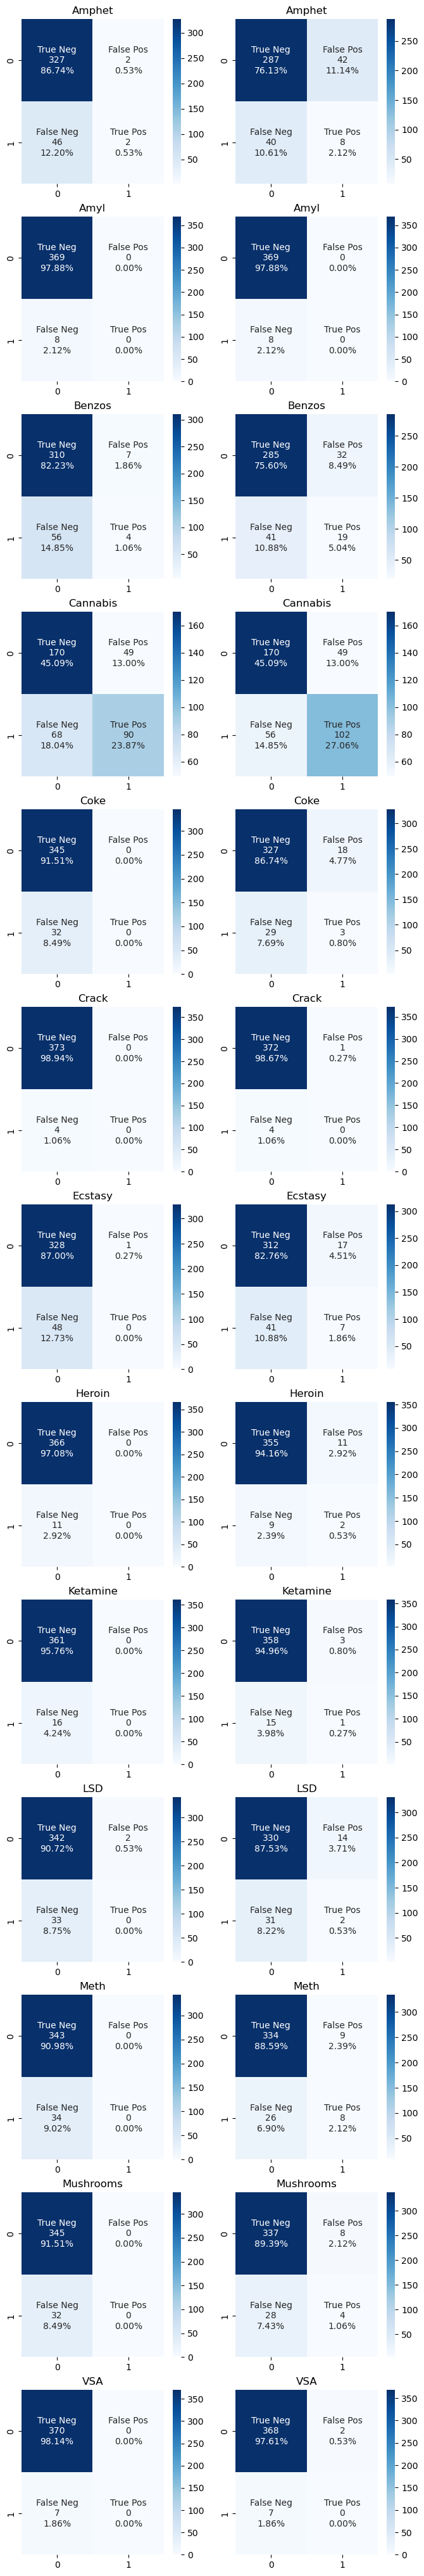

In [82]:
n = len(ileg)
_, ax = plt.subplots(n,2, figsize=(8,4*n))

for i in range(n):
    Log_func(ileg[i],ax[i,0], 'LR')
    Log_func(ileg[i],ax[i,1], 'GB')

In [83]:
df2['any_illeg'] = 0
df2.loc[df2[ileg].sum(axis=1) > 0,'any_illeg'] = 1

any_illeg f1: 74.52%
any_illeg f1: 74.53%


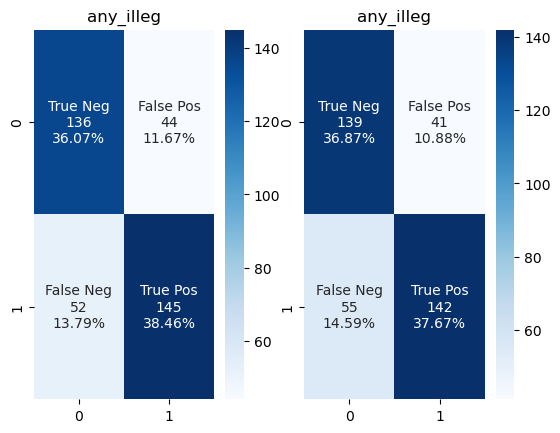

In [84]:
_,ax = plt.subplots(1,2)
Log_func('any_illeg', ax[0], 'LR')
Log_func('any_illeg', ax[1], 'GB')